In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

missing=pd.read_csv("Missing_female_cleaned.csv")

In [205]:
missing_female=missing.drop("Unnamed: 0",axis=1)

In [206]:
missing_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   6905 non-null   object 
 1   Date                   3392 non-null   object 
 2   Location               4151 non-null   object 
 3   Age                    3890 non-null   float64
 4   Race                   3951 non-null   object 
 5   Height                 3447 non-null   float64
 6   Weight                 3440 non-null   object 
 7   Description            6740 non-null   object 
 8   longitude              6905 non-null   float64
 9   latitude               6905 non-null   float64
 10  Numeric_Height_cm      3447 non-null   float64
 11  Numeric_Weight_lbs     3440 non-null   float64
 12  Standarized_Race       6905 non-null   object 
 13  Standarized_Ethnicity  6905 non-null   object 
dtypes: float64(6), object(8)
memory usage: 755.4+ KB


In [207]:
missing_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   6905 non-null   object 
 1   Date                   3392 non-null   object 
 2   Location               4151 non-null   object 
 3   Age                    3890 non-null   float64
 4   Race                   3951 non-null   object 
 5   Height                 3447 non-null   float64
 6   Weight                 3440 non-null   object 
 7   Description            6740 non-null   object 
 8   longitude              6905 non-null   float64
 9   latitude               6905 non-null   float64
 10  Numeric_Height_cm      3447 non-null   float64
 11  Numeric_Weight_lbs     3440 non-null   float64
 12  Standarized_Race       6905 non-null   object 
 13  Standarized_Ethnicity  6905 non-null   object 
dtypes: float64(6), object(8)
memory usage: 755.4+ KB


# Preporocessing 

## Selecting features for clustering

In [208]:
missing_female['Age'] = pd.to_numeric(missing_female['Age'], errors='coerce')
features=["Age", "longitude", "latitude", "Standarized_Race", "Standarized_Ethnicity"]
X = missing_female[features]
X

,Age,longitude,latitude,Standarized_Race,Standarized_Ethnicity
0,22.0,-95.850906,36.133716,White,Non-Hispanic/Latino
1,29.0,-97.940948,34.501888,White,Non-Hispanic/Latino
2,46.0,-95.893478,36.187628,White,Non-Hispanic/Latino
3,36.0,-94.738970,34.028478,White,Non-Hispanic/Latino
4,10.0,-97.566630,35.517138,White,Non-Hispanic/Latino
...,...,...,...,...,...
6900,5.0,-79.366537,43.654528,Other,Non-Hispanic/Latino
6901,31.0,-79.366601,43.654559,Black or African American,Non-Hispanic/Latino
6902,28.0,-79.383031,43.654104,White,Non-Hispanic/Latino
6903,26.0,-79.384077,43.653234,White,Non-Hispanic/Latino


In [209]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3890 non-null   float64
 1   longitude              6905 non-null   float64
 2   latitude               6905 non-null   float64
 3   Standarized_Race       6905 non-null   object 
 4   Standarized_Ethnicity  6905 non-null   object 
dtypes: float64(3), object(2)
memory usage: 269.9+ KB


# Preprocessing of categorical and numerical columns

In [210]:
numerical_features=["Age", "longitude", "latitude"]
categorical_features=["Standarized_Race", "Standarized_Ethnicity"]

numerical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
    

In [211]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [212]:
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

##  Preprocessor of categorical and numerical data

In [213]:


preprocessor=ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [214]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'longitude', 'latitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Standarized_Race',
                                  'Standarized_Ethnicity'])])

## Create a pipeline

In [216]:
clustering_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor), 
    ("clusterer", KMeans(n_clusters=13, random_state=123))
])


In [217]:
clustering_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'longitude',
                                                   'latitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Standarized_Race',
                                                   'Standarized_Ethnicity'])])),
                ('clusterer', KMeans(n_clusters=13, random_state=123))])

In [218]:
clustering_pipeline.fit(X)
cluster_labels=clustering_pipeline.named_steps["clusterer"].labels_

In [219]:
cluster_labels

array([3, 3, 8, ..., 3, 3, 5], dtype=int32)

In [220]:
X_preprocessed = clustering_pipeline.named_steps["preprocessor"].transform(X)

In [221]:
X_preprocessed

array([[-0.62221925, -0.36981166,  0.08547819, ...,  1.        ,
         0.        ,  1.        ],
       [-0.06041044, -0.40439424, -0.00898071, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.30398239, -0.37051607,  0.0885989 , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.14066884, -0.09732833,  0.52079833, ...,  1.        ,
         0.        ,  1.        ],
       [-0.30118564, -0.09734563,  0.52074797, ...,  1.        ,
         0.        ,  1.        ],
       [ 3.71173444, -0.09791467,  0.52014289, ...,  0.        ,
         0.        ,  1.        ]])

## Finding the optmital amount of clusters

Silhouette Score for 2 clusters: 0.5853
Silhouette Score for 3 clusters: 0.2602
Silhouette Score for 4 clusters: 0.3142
Silhouette Score for 5 clusters: 0.3628
Silhouette Score for 6 clusters: 0.3634
Silhouette Score for 7 clusters: 0.3852
Silhouette Score for 8 clusters: 0.3826
Silhouette Score for 9 clusters: 0.4261
Silhouette Score for 10 clusters: 0.4200
Silhouette Score for 11 clusters: 0.4233
Silhouette Score for 12 clusters: 0.4311
Silhouette Score for 13 clusters: 0.4397
Silhouette Score for 14 clusters: 0.4341
Silhouette Score for 15 clusters: 0.4184
Silhouette Score for 16 clusters: 0.4197
Silhouette Score for 17 clusters: 0.4130
Silhouette Score for 18 clusters: 0.3727
Silhouette Score for 19 clusters: 0.3581
Silhouette Score for 20 clusters: 0.3536


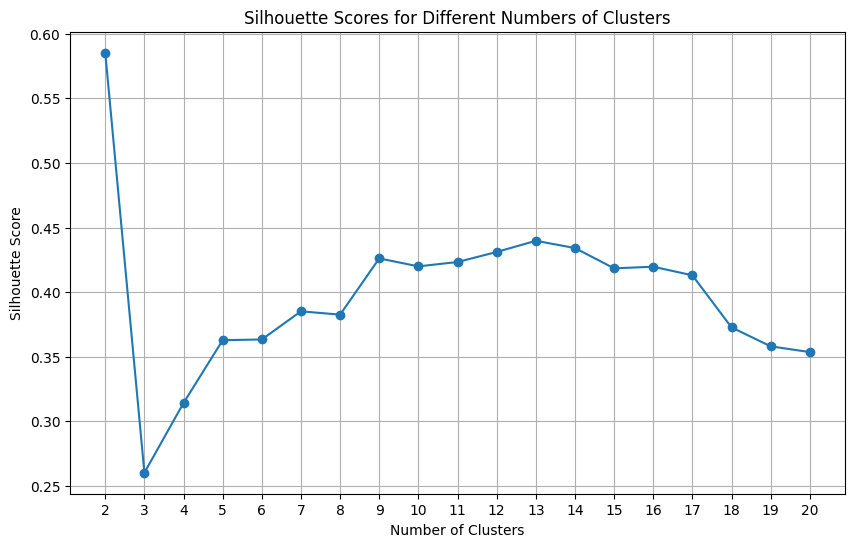

In [215]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def calculate_optimal_clusters(X, max_clusters, clustering_pipeline):
   
    silhouette_scores = []

    for n_clusters in range(2, max_clusters+1):
        clustering_pipeline.named_steps['clusterer'].n_clusters = n_clusters
        clustering_pipeline.fit(X)
        X_preprocessed = clustering_pipeline.named_steps['preprocessor'].transform(X)
        cluster_labels = clustering_pipeline.named_steps['clusterer'].labels_
        score = silhouette_score(X_preprocessed, cluster_labels)
        silhouette_scores.append(score)
        print(f"Silhouette Score for {n_clusters} clusters: {score:.4f}")
    
    # Plotting the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.xticks(range(2, max_clusters+1))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.grid(True)
    plt.show()

calculate_optimal_clusters(X, max_clusters=20, clustering_pipeline=clustering_pipeline)



# Centroids

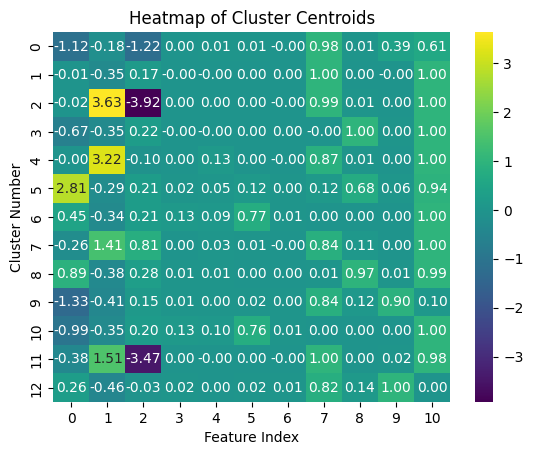

In [222]:
centroids = clustering_pipeline.named_steps["clusterer"].cluster_centers_
centroids

sns.heatmap(centroids, annot=True, fmt=".2f", cmap="viridis")
plt.title("Heatmap of Cluster Centroids")
plt.xlabel("Feature Index")
plt.ylabel("Cluster Number")
plt.show()


# Cluster Visualization 

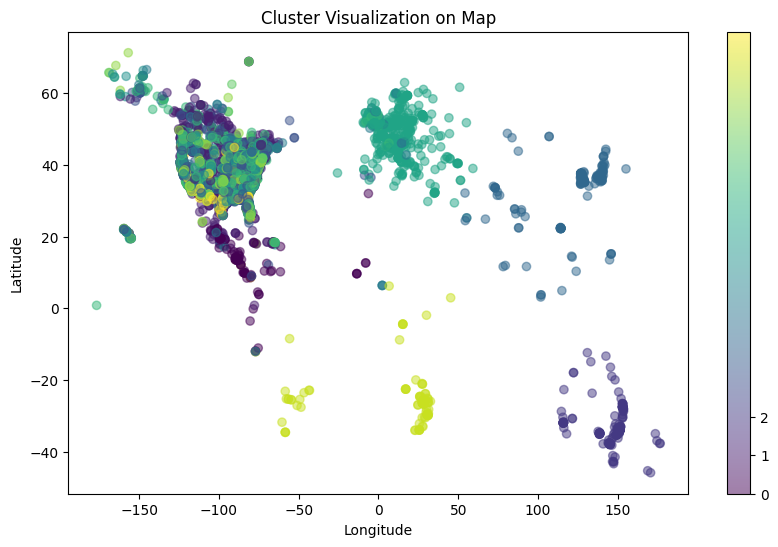

In [223]:
plt.figure(figsize=(10, 6))
plt.scatter(X['longitude'], X['latitude'], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(ticks=range(3))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization on Map')
plt.show()

# PCA 

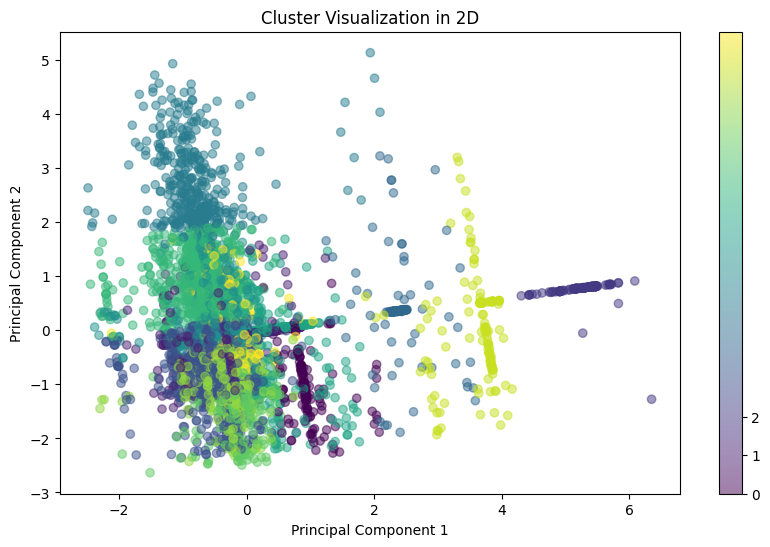

In [224]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(ticks=range(3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization in 2D')
plt.title('Cluster Visualization in 2D')
plt.show()

# Distribution of the data

In [225]:
X_modified = missing_female.copy()
X_modified["cluster"] = cluster_labels
X_modified

,name,Date,Location,Age,Race,Height,Weight,Description,longitude,latitude,Numeric_Height_cm,Numeric_Weight_lbs,Standarized_Race,Standarized_Ethnicity,cluster
0,Lisa Karen Addington,1984-05-16,"Tulsa, Oklahoma",22.0,Caucasian / White,173.0,125 lbs,"Addington was in Tulsa, Oklahoma in May 1984 t...",-95.850906,36.133716,173.0,125.0,White,Non-Hispanic/Latino,3
1,Gail Evon Anderson,2004-10-23,"Duncan, Oklahoma",29.0,Caucasian / White,150.0,120 lbs,Anderson was last seen in the evening hours of...,-97.940948,34.501888,150.0,120.0,White,Non-Hispanic/Latino,3
2,Ina M. Arnall,1981-05-28,"Poteau, Oklahoma",46.0,Caucasian / White,150.0,100.0 lbs,"Arnall was last seen in Poteau, Oklahoma on Ma...",-95.893478,36.187628,150.0,100.0,White,Non-Hispanic/Latino,8
3,Shirley Joann Banning,1975-05-23,"Broken Bow, Oklahoma",36.0,Caucasian / White,175.0,160 lbs,"Shirley was last seen in Broken Bow, Oklahoma ...",-94.738970,34.028478,175.0,160.0,White,Non-Hispanic/Latino,8
4,Amber Renee Barker,1997-12-08,"Oklahoma City, Oklahoma",10.0,Caucasian / White,150.0,75.0 lbs,Amber was last seen at approximately 6:00 p.m....,-97.566630,35.517138,150.0,75.0,White,Non-Hispanic/Latino,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,Mawahib Ahmed,2019-04-17,"Toronto, ON",5.0,NaN,NaN,NaN,"On April 14, 2019, at approximately 4:00 p.m.,...",-79.366537,43.654528,NaN,NaN,Other,Non-Hispanic/Latino,9
6901,Liyana Mohamed Abdow,2019-04-14,"Toronto, ON",31.0,Black,168.0,NaN,"On April 14, 2019, at approximately 4:00 p.m.,...",-79.366601,43.654559,168.0,NaN,Black or African American,Non-Hispanic/Latino,6
6902,Esther Adam,1996-05-15,"Toronto, ON",28.0,White,170.0,130 lbs,"On May 15, 1996, at approximately 1:30 p.m., E...",-79.383031,43.654104,170.0,130.0,White,Non-Hispanic/Latino,3
6903,Bonny Ainslie,1978-06-23,"Toronto, ON",26.0,White,155.0,141 lbs,"On the evening of June 23, 1978, Bonny Ainslie...",-79.384077,43.653234,155.0,141.0,White,Non-Hispanic/Latino,3


In [226]:
X_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   6905 non-null   object 
 1   Date                   3392 non-null   object 
 2   Location               4151 non-null   object 
 3   Age                    3890 non-null   float64
 4   Race                   3951 non-null   object 
 5   Height                 3447 non-null   float64
 6   Weight                 3440 non-null   object 
 7   Description            6740 non-null   object 
 8   longitude              6905 non-null   float64
 9   latitude               6905 non-null   float64
 10  Numeric_Height_cm      3447 non-null   float64
 11  Numeric_Weight_lbs     3440 non-null   float64
 12  Standarized_Race       6905 non-null   object 
 13  Standarized_Ethnicity  6905 non-null   object 
 14  cluster                6905 non-null   int32  
dtypes: f

In [227]:
cluster_descriptions = X_modified.groupby("cluster").describe()

In [228]:
cluster_descriptions

Age                                                      Height  \
          count       mean        std   min   25%   50%   75%   max   count   
cluster                                                                       
0         133.0  14.939850   6.953045   1.0  10.0  15.0  19.0  39.0    24.0   
1         133.0  27.436090   9.352810  14.0  20.0  25.0  32.0  50.0   119.0   
2           3.0  14.666667  11.676187   2.0   9.5  17.0  21.0  25.0     0.0   
3        1037.0  20.257473   7.043457   1.0  16.0  21.0  26.0  31.0  1113.0   
4          49.0  29.673469  17.713446   2.0  16.0  27.0  43.0  66.0    11.0   
5         370.0  64.816216   9.407300  51.0  57.0  63.0  71.0  92.0   320.0   
6         335.0  36.208955   6.769377  27.0  30.0  35.0  40.0  53.0   362.0   
7         177.0  21.593220  12.628591   1.0  13.0  19.0  32.0  50.0    29.0   
8         720.0  40.861111   6.133892  31.0  36.0  40.0  46.0  53.0   682.0   
9         258.0  13.197674   5.621290   1.0   9.0  15.0  17.0  24.0   233.0   
10        410.0  17.426829   5.559702   1.0  15.0  17.0  21.0  26.0   395.0   
11        103.0  22.466019  13.955683   1.0  14.0  20.0  29.5  64.0     1.0   
12        162.0  33.203704   7.737253  23.0  27.0  31.0  38.0  55.0   158.0   

                     ... Numeric_Height_cm        Numeric_Weight_lbs  \
               mean  ...               75%    max              count   
cluster              ...                                               
0        148.041667  ...             163.0  170.0               18.0   
1        162.016807  ...             168.0  185.0              105.0   
2               NaN  ...               NaN    NaN                0.0   
3        156.803235  ...             168.0  185.0             1136.0   
4        150.818182  ...             157.5  163.0                8.0   
5        161.090625  ...             165.0  279.0              325.0   
6        160.809392  ...             168.0  183.0              366.0   
7        157.931034  ...             168.0  183.0                2.0   
8        163.441349  ...             168.0  188.0              689.0   
9        144.467811  ...             160.0  229.0              237.0   
10       157.040506  ...             165.0  185.0              394.0   
11       160.000000  ...             160.0  160.0                0.0   
12       155.588608  ...             165.0  178.0              160.0   

                                                                    
               mean        std    min    25%    50%     75%    max  
cluster                                                             
0        105.444444  30.027874   42.0  100.5  113.5  120.00  150.0  
1        133.695238  30.183135   15.0  115.0  128.0  150.00  240.0  
2               NaN        NaN    NaN    NaN    NaN     NaN    NaN  
3        120.633803  34.666996   10.0  110.0  120.0  135.00  300.0  
4        103.000000  22.405357   65.0   90.0  105.0  112.25  140.0  
5        141.987692  34.103508   70.0  120.0  136.0  160.00  368.0  
6        143.366120  41.105309    2.0  120.0  135.0  161.00  350.0  
7        130.000000   0.000000  130.0  130.0  130.0  130.00  130.0  
8        137.920174  30.174315   85.0  118.0  130.0  150.00  300.0  
9        108.392405  38.159928   17.0   99.0  115.0  130.00  200.0  
10       127.855330  39.081397   21.0  110.0  125.0  145.75  300.0  
11              NaN        NaN    NaN    NaN    NaN     NaN    NaN  
12       139.793750  41.232139    7.0  120.0  135.0  160.00  300.0  

[13 rows x 48 columns]

## Create a plot 

/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

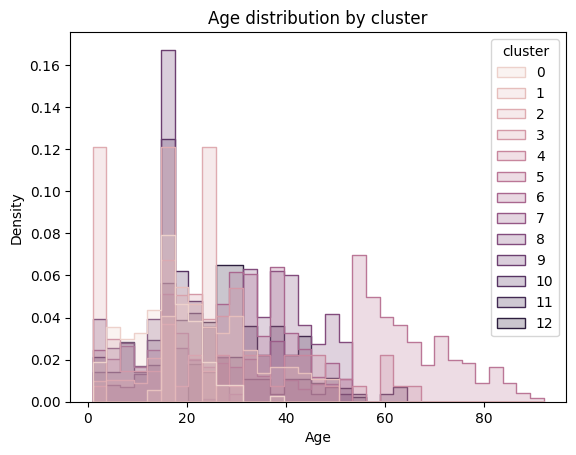

In [229]:
sns.histplot(data=X_modified, hue="cluster", element="step", stat="density", x="Age", common_norm=False)
plt.title("Age distribution by cluster")
plt   

## Box plot for Weights across clusters

/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


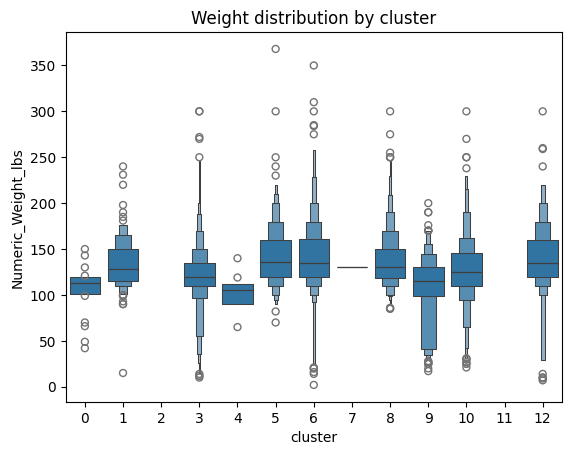

In [230]:
sns.boxenplot(data=X_modified, x="cluster", y="Numeric_Weight_lbs")
plt.title("Weight distribution by cluster")
plt.show()

## A heatmap of Mean statistics by cluster

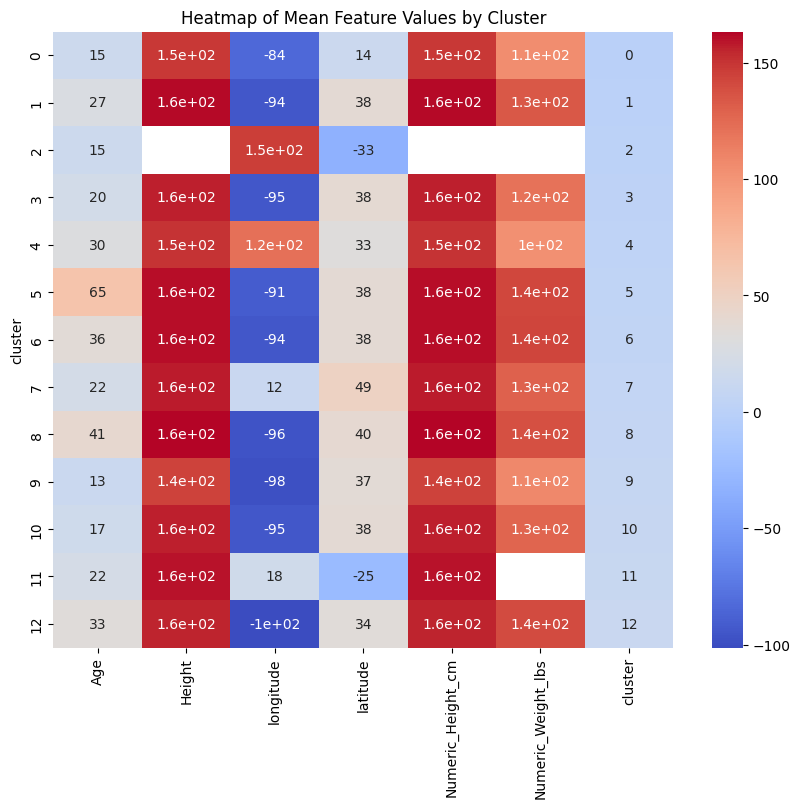

In [231]:
numeric_columns = X_modified.select_dtypes(include=np.number).columns
cluster_means = X_modified.groupby("cluster")[numeric_columns].mean()

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Heatmap of Mean Feature Values by Cluster')
plt.show()


# Radar Chart

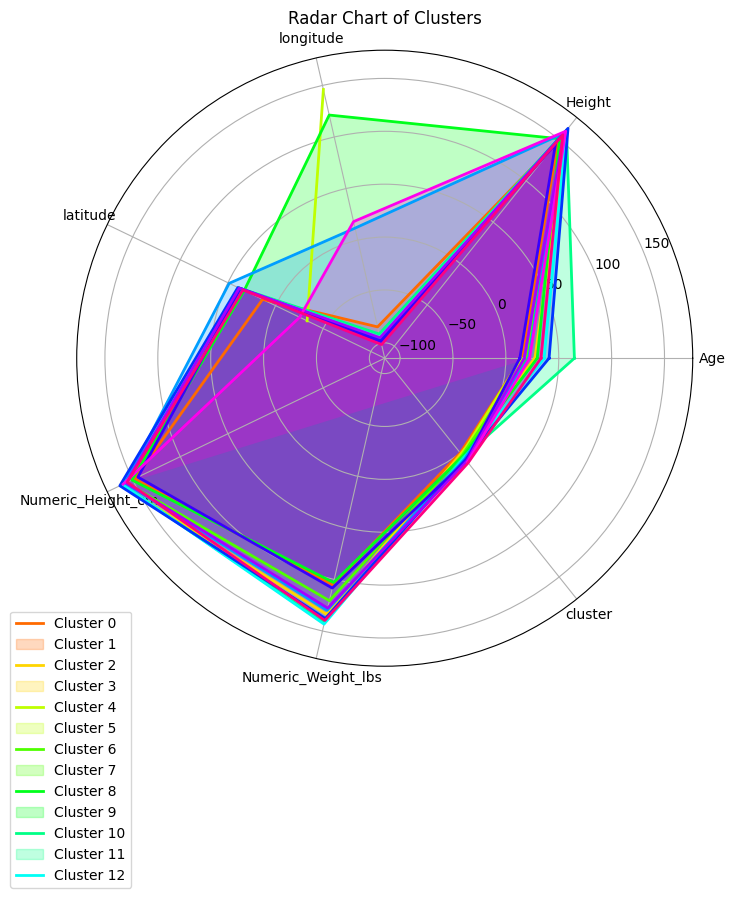

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

labels = cluster_means.columns.values  # This should be the array of feature names


num_vars = len(labels)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first value to close the circle


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


ax.set_thetagrids(np.degrees(angles[:-1]), labels)

def add_to_plot(values, color):
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.25)

palette = sns.color_palette("hsv", n_colors=cluster_means.index.size)

for i, (cluster_id, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the loop
    add_to_plot(values, palette[i])

legend_labels = [f'Cluster {cluster_id}' for cluster_id in cluster_means.index]
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Radar Chart of Clusters')
plt.show()


# Map visualization

## Global map

In [233]:
import folium
import seaborn as sns

# Function to convert RGB to Hex, Folium needs hex colors
def rgb_to_hex(rgb_color):
    return '#%02x%02x%02x' % (int(rgb_color[0] * 255), int(rgb_color[1] * 255), int(rgb_color[2] * 255))

# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[X_modified['latitude'].mean(), X_modified['longitude'].mean()], zoom_start=2)

# Generate a color palette with as many colors as there are clusters
num_clusters = X_modified['cluster'].nunique()
palette = [rgb_to_hex(color) for color in sns.color_palette("hsv", n_colors=num_clusters)]

# Add points to the map
for idx, row in X_modified.iterrows():
    # Check if the 'cluster' is in the row, and if not, set a default value
    cluster = row.get('cluster', 'Unknown')
    # Get the color for the corresponding cluster from the palette
    color = palette[cluster] if cluster != 'Unknown' else 'black'
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        popup=f'Cluster: {cluster}'
    ).add_to(m)

# Display the map
m
m.save('map.html')


## USA clusters map

In [235]:
import folium
import seaborn as sns

# Convert RGB colors to hexadecimal format for Folium
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

# Filter for latitude and longitude within the USA ranges
usa_only = X_modified[
    (X_modified['latitude'] >= 24) & (X_modified['latitude'] <= 50) &
    (X_modified['longitude'] >= -125) & (X_modified['longitude'] <= -66)
]

# Now create the map with the filtered data
m = folium.Map(location=[usa_only['latitude'].mean(), usa_only['longitude'].mean()], zoom_start=4)

# Assuming 'cluster' column exists and 'cluster' values are integers
# Generate a color palette with as many colors as there are clusters
palette = sns.color_palette("hsv", n_colors=usa_only['cluster'].nunique())
palette = list(map(rgb_to_hex, palette))  # Convert to hex color values

# Create a dictionary to map cluster numbers to palette colors
cluster_colors = {cluster: palette[i] for i, cluster in enumerate(sorted(usa_only['cluster'].unique()))}

# Add points to the map
for idx, row in usa_only.iterrows():
    cluster = row['cluster']
    color = cluster_colors[cluster]  # Use the mapping dictionary
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        popup=f'Cluster: {cluster}'
    ).add_to(m)

# Save the map to an HTML file
m.save('usa_clusters_map.html')



In [236]:
cluster7=X_modified[X_modified["cluster"]==3]
cluster7

,name,Date,Location,Age,Race,Height,Weight,Description,longitude,latitude,Numeric_Height_cm,Numeric_Weight_lbs,Standarized_Race,Standarized_Ethnicity,cluster
0,Lisa Karen Addington,1984-05-16,"Tulsa, Oklahoma",22.0,Caucasian / White,173.0,125 lbs,"Addington was in Tulsa, Oklahoma in May 1984 t...",-95.850906,36.133716,173.0,125.0,White,Non-Hispanic/Latino,3
1,Gail Evon Anderson,2004-10-23,"Duncan, Oklahoma",29.0,Caucasian / White,150.0,120 lbs,Anderson was last seen in the evening hours of...,-97.940948,34.501888,150.0,120.0,White,Non-Hispanic/Latino,3
4,Amber Renee Barker,1997-12-08,"Oklahoma City, Oklahoma",10.0,Caucasian / White,150.0,75.0 lbs,Amber was last seen at approximately 6:00 p.m....,-97.566630,35.517138,150.0,75.0,White,Non-Hispanic/Latino,3
5,Carol Ann Batterman,1958-05-31,"Oklahoma City, Oklahoma",19.0,Caucasian / White,165.0,115 lbs,Carol was last seen waiting for a bus outside ...,-97.503748,35.371660,165.0,115.0,White,Non-Hispanic/Latino,3
6,Lauria Jaylene Bible,1999-12-30,"Welch, Oklahoma",16.0,American Indian / Native American (Cherokee Na...,165.0,130 lbs,Ashley resided in a trailer home outside of We...,-95.078774,36.874231,165.0,130.0,White,Non-Hispanic/Latino,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,Rosella Amanda Delong,1947-12-15,"Toronto, ON",29.0,White,165.0,145 lbs,"On the day of her disappearance, Rosella left ...",-79.383436,43.653641,165.0,145.0,White,Non-Hispanic/Latino,3
6890,Patricia Janice Salamandyk,1972-06-01,"Spruce Grove, AB",16.0,White,170.0,121 lbs,In 1972 Patricia Salamandyk got off the school...,-113.910077,53.557912,170.0,121.0,White,Non-Hispanic/Latino,3
6899,Anna Marquart,2020-07-04,"Glenboro, MB",30.0,White,157.0,119 lbs,"On July 4, 2020, Anna Marquart was last seen b...",-99.288574,49.559711,157.0,119.0,White,Non-Hispanic/Latino,3
6902,Esther Adam,1996-05-15,"Toronto, ON",28.0,White,170.0,130 lbs,"On May 15, 1996, at approximately 1:30 p.m., E...",-79.383031,43.654104,170.0,130.0,White,Non-Hispanic/Latino,3
